# Linear Regression
## Linear
\begin{equation*}
Y = wX + b
\end{equation*}

In [1]:
import tensorflow as tf
import utils
import matplotlib.pyplot as plt
import numpy as np

DATA_FILE = "data/birth_life_2010.txt"

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Step 1: read in data from the .txt file
# data is a numpy array of shape (190, 2), each row is a datapoint
data, n_samples = utils.read_birth_life_data(DATA_FILE)

In [3]:
# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [4]:
# Step 3: create weight and bias, initialized to 0
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

In [5]:
# Step 4: construct model to predict Y (life expectancy from birth rate)
Y_predicted = w * X + b

In [6]:
# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

In [7]:
# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [8]:
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.variables_initializer(var_list=[w, b]))
    
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    # Step 8: train the model
    for i in range(100): # run 100 epochs
        for x, y in data:
            # Session runs train_op to minimize loss
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b])
    writer.close()

In [9]:
w_out, b_out

(-6.0702143, 84.92951)

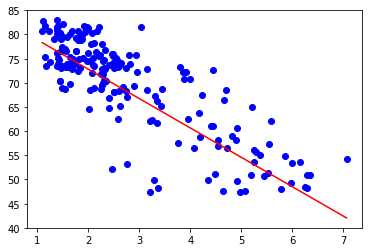

In [10]:
plt.plot(data[:,0], data[:,1], 'bo')
x_line = data[:,0]
x_line = np.sort(x_line)
y_line = w_out * x_line + b_out
plt.plot(x_line, y_line, 'r-')
plt.show()

## Quadratic function
\begin{equation*}
Y_{predicted} = wX^2 + uX + b
\end{equation*}

In [11]:
# Step 3: create variables: weights_1, weights_2, bias. All are initialized to 0
w1 = tf.get_variable('weights_1', initializer=tf.constant(0.0))
u1 = tf.get_variable('weights_2', initializer=tf.constant(0.0))
b1 = tf.get_variable('bias_1', initializer=tf.constant(0.0))

In [12]:
# Step 4: predict Y (number of theft) from the number of fire
Y_predicted1 = w1 * X * X + X * u1 + b1

In [13]:
# Step 5: Profit!
loss1 = tf.square(Y - Y_predicted1, name='loss1')
optimizer1 = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss1)

with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.variables_initializer(var_list=[w1, u1, b1]))
    
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    # Step 8: train the model
    for i in range(100): # run 100 epochs
        for x, y in data:
            # Session runs train_op to minimize loss
            sess.run(optimizer1, feed_dict={X: x, Y: y})
            
    # Step 9: output the values of w and b
    w_out1, u_out1, b_out1 = sess.run([w1, u1, b1])
    writer.close()

In [14]:
w_out1, u_out1, b_out1

(-1.4849563, 8.214782, 61.223858)

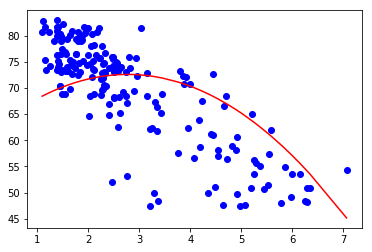

In [15]:
plt.plot(data[:,0], data[:,1], 'bo')
x_curve = data[:,0]
x_curve = np.sort(x_curve)
y_curve = w_out1 * x_curve * x_curve + u_out1 * x_curve + b_out1
plt.plot(x_curve, y_curve, 'r-')
plt.show()

# Huber loss
\begin{equation}
L_{\delta}(y, f(x)) = 
\begin{cases}
\frac{1}{2}(y - f(x))^2,& \text{for }|y-f(x)| \leq \delta \\ 
\delta  |y-f(x)| - \frac{1}{2}\delta^2,& \text{otherwise.}
\end{cases}
\end{equation}

In [ ]:
if tf.abs(Y_predicted - Y) <= delta:
    # do something

In [19]:
tf.cond(
        pred,
        true_fn=None,
        false_fn=None,
        ...)
tf.cond?

Signature: tf.cond(pred, true_fn=None, false_fn=None, strict=False, name=None, fn1=None, fn2=None)
Docstring:
Return `true_fn()` if the predicate `pred` is true else `false_fn()`. (deprecated arguments)

SOME ARGUMENTS ARE DEPRECATED. They will be removed in a future version.
Instructions for updating:
fn1/fn2 are deprecated in favor of the true_fn/false_fn arguments.

`true_fn` and `false_fn` both return lists of output tensors. `true_fn` and
`false_fn` must have the same non-zero number and type of outputs.

Note that the conditional execution applies only to the operations defined in
`true_fn` and `false_fn`. Consider the following simple program:

```python
z = tf.multiply(a, b)
result = tf.cond(x < y, lambda: tf.add(x, z), lambda: tf.square(y))
```

If `x < y`, the `tf.add` operation will be executed and `tf.square`
operation will not be executed. Since `z` is needed for at least one
branch of the `cond`, the `tf.multiply` operation is always executed,
unconditionally.
Although th

In [16]:
def huber_loss(labels, predictions, delta=14.0):
    residual = tf.abs(labels - predictions)
    def f1(): return 0.5 * tf.square(residual)
    def f2(): return delta * residual - 0.5 * tf.square(delta)
    return tf.cond(residual < delta, f1, f2)

In [17]:
w_huber = tf.get_variable('weights_huber', initializer=tf.constant(0.0))
b_huber = tf.get_variable('bias_huber', initializer=tf.constant(0.0))

In [18]:
Y_predicted_huber = w_huber * X + b_huber

In [19]:
loss_huber = huber_loss(Y, Y_predicted_huber)
optimizer_huber = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss_huber)

with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.variables_initializer(var_list=[w_huber, b_huber]))
    
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    # Step 8: train the model
    for i in range(100): # run 100 epochs
        for x, y in data:
            # Session runs train_op to minimize loss
            sess.run(optimizer_huber, feed_dict={X: x, Y: y})
            
    # Step 9: output the values of w and b
    w_out_huber, b_out_huber = sess.run([w_huber, b_huber])
    writer.close()

In [20]:
w_out_huber, b_out_huber

(-4.2249994, 78.485054)

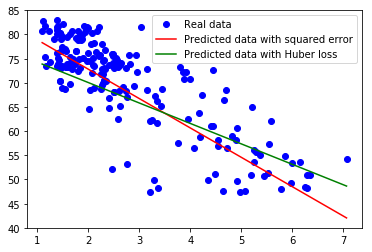

In [21]:
plt.plot(data[:,0], data[:,1], 'bo')
x_line = data[:,0]
x_line = np.sort(x_line)
y_line = w_out * x_line + b_out
plt.plot(x_line, y_line, 'r-')
y_huber = w_out_huber * x_line + b_out_huber
plt.plot(x_line, y_huber, 'g-')
plt.legend(['Real data', 'Predicted data with squared error', 'Predicted data with Huber loss'])
plt.show()

# tf.data

placeholder와 feed_dicts는 Tensorflow 밖의 데이터에 대해 shuffle, batch, generate arbitrary data를 쉽게 해준다.  
하지만 하나의 thread로 데이터를 처리하고 이는 data bottleneck를 만들기 때문에 프로그램이 느려질 수 있다는 단점이 있다.  

Tensorflow는 pipelining, threading을 할 수 있는 queue를 제공한다.  
이는 placeholder에 비해 속도가 줄어들지만, 다루기가 어려울 뿐더러 문제가 생길 수 있다.

tf.data는 placeholder보다 빠르고 queue보다 다루기 쉽다!  
numpy array에 데이터를 저장하는 placeholder와 달리, tf.data.Dataset에 저장한다.

In [ ]:
tf.data.Dataset.from_tensor_slices((features, labels))
# features와 label은 tensor라 보일 수 있지만, numpy array가 될 수도 있다.(tensorflow와 numpy는 통합되어 있다고 볼 수 있기 때문에)

In [22]:
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))

In [23]:
print(dataset.output_types)
print(dataset.output_shapes)

(tf.float32, tf.float32)
(TensorShape([]), TensorShape([]))


- tf.data.TextLineDataset(filenames): csv파일처럼 한 줄씩 불러올 때 좋음
- tf.data.FixedLengthRecordDataset(filenames): CIFAR나 ImageNet처럼 길이가 정해져 있을 때 좋음
- tf.data.TFRecordDataset(filenames): data가 tfrecord format으로 저장되어 있을 때 좋음

In [ ]:
# Example
dataset = tf.data.FixedLengthRecordDataset([file1, file2, file3, ...])

In [24]:
iterator = dataset.make_one_shot_iterator()
X, Y = iterator.get_next() # X is the birth rate, Y is the life expectancy

X, Y를 실행할 때 마다 새로운 데이터를 얻을 수 있다

In [25]:
with tf.Session() as sess:
    print(sess.run([X, Y]))
    print(sess.run([X, Y]))
    print(sess.run([X, Y]))

[1.822, 74.82825]
[3.869, 70.81949]
[3.911, 72.15066]


In [ ]:
iterator = dataset.make_initializable_iterator() # to use for multiple epochs

with tf.Session() as sess:
    for i in range(100): # train the model 100 epochs
        sess.run(iterator.initializer)
        total_loss = 0
        try:
            while True:
                sess.run([optimizer])
        except tf.errors.OutOfRangeError:
            pass

In [ ]:
dataset = dataset.shuffle(1000)
dataset = dataset.repeat(100)
dataset = dataset.batch(128)
dataset = dataset.map(lambda x: tf.one_hot(x, 10))
# convert each element of dataset to one_hot vector

# Optimizers

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
sess.run([[optimizer]])

Optimizer는 모든 trainable variables를 train시킨다.  
train을 원하는 않는 변수는 trainable=False로 정의해주면 된다.

In [ ]:
global_step = tf.Variable(0, trainable=False, dtype=tf.int32)
learning_rate = 0.01 * 0.99 ** tf.cast(global_step, tf.float32)
increment_step = global_step.assign_add(1)
optimizer = tf.train.GradientDescentOptimizer(learning_rate) # learning rate can be a tensor

In [ ]:
tf.Variable(
    initial_value=None,
    trainable=True,
    collections=None,
    validate_shape=True,
    caching_device=None,
    name=None,
    variable_def=None,
    dtype=None,
    expected_shape=None,
    import_scope=None,
    constraint=None
)

tf.get_variable(
    name,
    shape=None,
    dtype=None,
    initializer=None,
    regularizer=None,
    trainable=True,
    collections=None,
    caching_device=None,
    partitioner=None,
    validate_shape=True,
    use_resource=None,
    custom_getter=None,
    constraint=None
)


특정 변수의 gradients를 얻을 수 있고 optimizer로 계산된 gradients를 수정할 수 있다.

In [ ]:
# create an optimizer.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

# compute the gradients for a list of variables.
grads_and_vars = optimizer.compute_gradients(loss, <list of variables>)

# grads_and_vars is a list of tuples (gradient, variable).
# Do whatever you need to the 'gradient' part, for example, subtract each of them by 1.
subtracted_grads_and_vars = [(gv[0] - 1.0, gv[1]) for gv in grads_and_vars]

# ask the optimizer to apply the subtracted gradients.
optimizer.apply_gradients(subtracted_grads_and_vars)

tf.stop_gradient를 통해 특정 tensor의 미분 값 계산을 막을 수 있다.  
- GAN
- EM(Expectation-Maximization) algorithm

In [2]:
tf.stop_gradient?

Signature: tf.stop_gradient(input, name=None)
Docstring:
Stops gradient computation.

When executed in a graph, this op outputs its input tensor as-is.

When building ops to compute gradients, this op prevents the contribution of
its inputs to be taken into account.  Normally, the gradient generator adds ops
to a graph to compute the derivatives of a specified 'loss' by recursively
finding out inputs that contributed to its computation.  If you insert this op
in the graph it inputs are masked from the gradient generator.  They are not
taken into account for computing gradients.

This is useful any time you want to compute a value with TensorFlow but need
to pretend that the value was a constant. Some examples include:

*  The *EM* algorithm where the *M-step* should not involve backpropagation
   through the output of the *E-step*.
*  Contrastive divergence training of Boltzmann machines where, when
   differentiating the energy function, the training must not backpropagate
   through 

optimizer클래스는 자동으로 미분 값을 계산해주고, tf.gradients를 통해 특정 gradients를 계산할 수 있다.

In [3]:
tf.gradients(
    ys,
    xs,
    grad_ys=None,
    name='gradients',
    colocate_gradients_with_ops=False,
    gate_gradients=False,
    aggregation_method=None,
    stop_gradients=None
)
tf.gradients?

Signature: tf.gradients(ys, xs, grad_ys=None, name='gradients', colocate_gradients_with_ops=False, gate_gradients=False, aggregation_method=None, stop_gradients=None)
Docstring:
Constructs symbolic derivatives of sum of `ys` w.r.t. x in `xs`.

`ys` and `xs` are each a `Tensor` or a list of tensors.  `grad_ys`
is a list of `Tensor`, holding the gradients received by the
`ys`. The list must be the same length as `ys`.

`gradients()` adds ops to the graph to output the derivatives of `ys` with
respect to `xs`.  It returns a list of `Tensor` of length `len(xs)` where
each tensor is the `sum(dy/dx)` for y in `ys`.

`grad_ys` is a list of tensors of the same length as `ys` that holds
the initial gradients for each y in `ys`.  When `grad_ys` is None,
we fill in a tensor of '1's of the shape of y for each y in `ys`.  A
user can provide their own initial `grad_ys` to compute the
derivatives using a different initial gradient for each y (e.g., if
one wanted to weight the gradient differently for

In [ ]:
tf.train.Optimizer
tf.train.GradientDescentOptimizer
tf.train.AdadeltaOptimizer
tf.train.AdagradOptimizer
tf.train.AdagradDAOptimizer
tf.train.MomentumOptimizer
tf.train.AdamOptimizer
tf.train.FtrlOptimizer
tf.train.ProximalGradientDescentOptimizer
tf.train.ProximalAdagradOptimizer
tf.train.RMSPropOptimizer

### “RMSprop is an extension of Adagrad that deals with its radically diminishing learning rates. It is identical to Adadelta, except that Adadelta uses the RMS of parameter updates in the numerator update rule. Adam, finally, adds bias-correction and momentum to RMSprop. Insofar, RMSprop, Adadelta, and Adam are very similar algorithms that do well in similar circumstances. Kingma et al. [15] show that its bias-correction helps Adam slightly outperform RMSprop towards the end of optimization as gradients become sparser. Insofar, Adam might be the best overall choice.”


### TL;DR: Use AdamOptimizer.

# Logistic Regression

## MNIST(Mixed National Institute of Standards and Technology database)
- each image is 28 x 28 pixels (각 image를 1-d tensor로 바꾸면 size가 784)
- Each comes with a label from 0 to 9
- The dataset is hosted on Yann Lecun's website

In [ ]:
# for downloading MNIST through TF Learn
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/mnist', one_hot=True)

## One-hot encoding
### In digital circuits, one-hot refers to a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0).

### In this case, one-hot encoding means that if the output of the image is the digit 7, then the output will be encoded as a vector of 10 elements with all elements being 0, except for the element at index 7 which is 1.

In [1]:
""" Solution for simple logistic regression model for MNIST
with tf.data module
MNIST dataset: yann.lecun.com/exdb/mnist/
Created by Chip Huyen (chiphuyen@cs.stanford.edu)
CS20: "TensorFlow for Deep Learning Research"
cs20.stanford.edu
Lecture 03
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import tensorflow as tf
import time

import utils

# Define paramaters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 30
n_train = 60000
n_test = 10000

# Step 1: Read in data
mnist_folder = 'data/mnist'
utils.download_mnist(mnist_folder)
train, val, test = utils.read_mnist(mnist_folder, flatten=True)

# Step 2: Create datasets and iterator
train_data = tf.data.Dataset.from_tensor_slices(train)
train_data = train_data.shuffle(10000) # if you want to shuffle your data
train_data = train_data.batch(batch_size)

test_data = tf.data.Dataset.from_tensor_slices(test)
test_data = test_data.batch(batch_size)

iterator = tf.data.Iterator.from_structure(train_data.output_types, 
                                           train_data.output_shapes)
img, label = iterator.get_next()

train_init = iterator.make_initializer(train_data)	# initializer for train_data
test_init = iterator.make_initializer(test_data)	# initializer for train_data

# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
w = tf.get_variable(name='weights', shape=(784, 10), initializer=tf.random_normal_initializer(0, 0.01))
b = tf.get_variable(name='bias', shape=(1, 10), initializer=tf.zeros_initializer())

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(img, w) + b 

# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=label, name='entropy')
loss = tf.reduce_mean(entropy, name='loss') # computes the mean over all the examples in the batch

# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

# Step 7: calculate accuracy with test set
preds = tf.nn.softmax(logits)
correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(label, 1))
accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))

writer = tf.summary.FileWriter('./graphs/logreg', tf.get_default_graph())
with tf.Session() as sess:
   
    start_time = time.time()
    sess.run(tf.global_variables_initializer())

    # train the model n_epochs times
    for i in range(n_epochs): 	
        sess.run(train_init)	# drawing samples from train_data
        total_loss = 0
        n_batches = 0
        try:
            while True:
                _, l = sess.run([optimizer, loss])
                total_loss += l
                n_batches += 1
        except tf.errors.OutOfRangeError:
            pass
        print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
    print('Total time: {0} seconds'.format(time.time() - start_time))

    # test the model
    sess.run(test_init)			# drawing samples from test_data
    total_correct_preds = 0
    try:
        while True:
            accuracy_batch = sess.run(accuracy)
            total_correct_preds += accuracy_batch
    except tf.errors.OutOfRangeError:
        pass

    print('Accuracy {0}'.format(total_correct_preds/n_test))
writer.close()

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


data/mnist/train-images-idx3-ubyte.gz already exists
data/mnist/train-labels-idx1-ubyte.gz already exists
data/mnist/t10k-images-idx3-ubyte.gz already exists
data/mnist/t10k-labels-idx1-ubyte.gz already exists
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Average loss epoch 0: 0.3662820118457772
Average loss epoch 1: 0.29320197296003964
Average loss epoch 2: 0.2827374105883199
Average loss epoch 3: 0.2775724386753038
Average loss epoch 4: 0.27064311991250795
Average loss epoch 5: 0.2714897514602473
Average loss epoch 6: 0.2689218979588775
Average loss epoch 7: 0.26733632948856023
Average loss epoch 8: 0.2629212917283524
Average loss epoch 9: 0.2623859111306279
Average loss epoch 10: 0.2629049094090628
Average loss epoch 11: 0.26166703234924826
Average loss epoch 12: 0.26130418846773545
Average loss epoch 13: 0.25815800194476923
Average loss epoc

In [2]:
mnist_folder = 'data/mnist'
utils.download_mnist(mnist_folder)
train, val, test = utils.read_mnist(mnist_folder, flatten=True) # flatten=True: for flattening each image into a 1-d tensor.
# train, val, test는 numpy array의 tuple이고 첫 번째는 images, 두 번째는 labels

data/mnist/train-images-idx3-ubyte.gz already exists
data/mnist/train-labels-idx1-ubyte.gz already exists
data/mnist/t10k-images-idx3-ubyte.gz already exists
data/mnist/t10k-labels-idx1-ubyte.gz already exists


In [3]:
train_data = tf.data.Dataset.from_tensor_slices(train)
# train_data = train_data.shuffle(10000) # if you want to shuffle your data
test_data = tf.data.Dataset.from_tensor_slices(test)

logistic regression model 형성은 linear regression model과 유사하다.  
하지만 아주 많은 데이터가 있기 때문에 한 데이터마다 gradient를 계산하면 매우 느리다.  
우리는 배치로 데이터에 접근할 수 있다!  

In [4]:
train_data = train_data.batch(batch_size)
test_data = test_data.batch(batch_size)

두 dataset에서 sample을 얻기 위해 iterator를 만든다.  
linear regression example에서는 train set만 사용해서 iterator 하나만 만들고 sample들을 보냈다.  
여기선 dataset이 하나 보다 많기 때문에, 각 dataset당 iterator가 있으면 각 iterator당 하나의 graph가 필요하다.  
더 좋은 방법은 iterator 하나만 만들고 초기화하는 것이다.

In [5]:
iterator = tf.data.Iterator.from_structure(train_data.output_types,
                                           train_data.output_shapes)
img, label = iterator.get_next()

In [7]:
train_init = iterator.make_initializer(train_data) # initializer for train_data
test_init = iterator.make_initializer(test_data) # initializer for test_data

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(n_epochs): # train the model n_epochs times
        sess.run(train_init)  # drawing samples from train_data
        try:
            while True:
                _, l = sess.run([optimizer, loss])
        except tf.errors.OutOfRangeError:
            pass
        
    # test the model
    sess.run(test_init)       # drawing samplex from test_data
    try:
        while True:
            sess.run(accuracy)
    except tf.errors.OutOfRangeError:
        pass